In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from matplotlib import animation
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from skimage.transform import resize
import initial_distributions
import iceing
import evaluation
import scipy.stats as stats

### Entropy vs Control Parameter

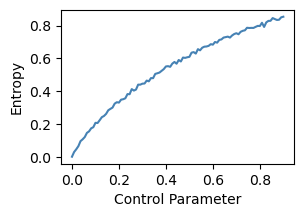

In [2]:
order_func = initial_distributions.entropy_topology_noscale

control_parameter_range = np.linspace(0.1, 1, 100)
order_parameters = []

for control_parameter in control_parameter_range:
    dist = initial_distributions.order_distribution(control_parameter,size=100)
    res = order_func(dist)
    order_parameters.append(res)


plt.figure(figsize=(12/4,8/4))
plt.plot(1-control_parameter_range, order_parameters,"steelblue")
plt.xlabel("Control Parameter")
plt.ylabel("Entropy")
# plt.title("Entropy vs. Control Parameter")
plt.savefig("entropy_vs_control_parameter", bbox_inches="tight", dpi=300, transparent=True)

### Real life topography

In [3]:
size = 100
x,y = np.meshgrid(np.linspace(0, 1, size), np.linspace(0, 1, size))
mode = 'snow_dune'              # topography type
tmax = 2; dt = 0.1              # diffusion time and time-step if mode = 'diffusion' or mode = 'rayleigh'
g = 1                           # anisotropy parameter
sigma_h = 0.03                  # surface standard deviation
snow_dune_radius = 1.           # mean snow dune radius if mode = 'snow_dune'
Gaussians_per_pixel = 0.2       # density of snow dunes if mode = 'snow_dune'
snow_dune_height_exponent = 1.  # exponent that relates snow dune radius and snow dune height if mode = 'snow_dune'

mean_freeboard = 0.1

Tdrain = 10.; dt_drain = 0.5    # time and time-step of to drainage

# create topography
z = initial_distributions.Create_Initial_Topography(res = size, mode = mode, tmax = tmax, dt = dt, g = g, sigma_h = sigma_h, h = mean_freeboard, snow_dune_radius = snow_dune_radius,
            Gaussians_per_pixel = Gaussians_per_pixel, number_of_r_bins = 150, window_size = 5, snow_dune_height_exponent = snow_dune_height_exponent)



/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/paulhosek/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


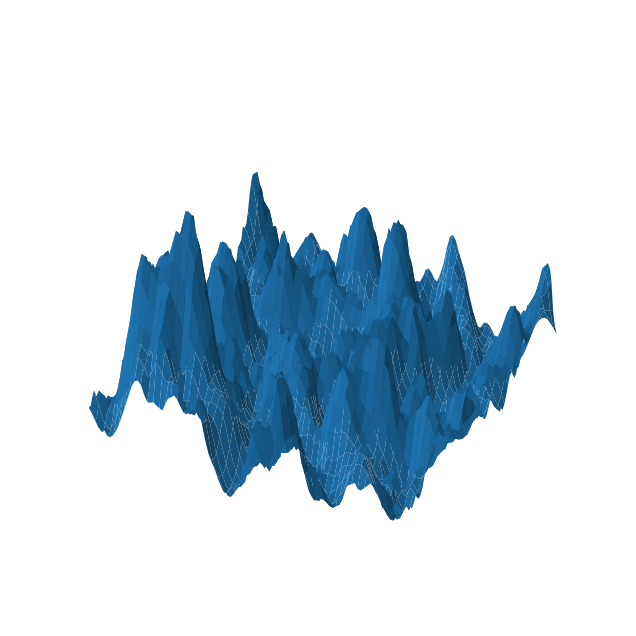

In [4]:
fig = plt.figure(figsize=(11,8))
ax2 = fig.add_subplot(111,projection="3d")
ax2.plot_surface(x, y, z)
plt.axis("off")
plt.savefig(f"snow_dune",bbox_inches="tight", dpi=300, transparent=True)

In [5]:
control_parameter_range, order_parameters, entropys = evaluation.main_topography_change_order(size=100)

AttributeError: module 'evaluation' has no attribute 'entropy_v4'

In [ ]:
plt.figure(figsize=(11/2,8/2))
plt.plot(control_parameter_range, 1-np.array(order_parameters),"steelblue", label="order paramter")
# plt.plot(control_parameter_range, entropys,"orange", label="entropy")
plt.xlabel("Control Parameter")
plt.ylabel("Order Parameter")
plt.title("Order Parameter vs Control Parameter")
plt.legend()
plt.savefig("order_vs_control parameter", bbox_inches="tight", dpi=300,transparent=True)